In [1]:
from pandas import Series, DataFrame, MultiIndex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 多级索引

MultiIndex(多级索引)对象和标准的Index(索引)对象相似，用来储存轴标签。可以把MultiIndex想象成由元组构成的数组。

In [2]:
arrays = [
    ['bar', 'bar', 'bar', 'foo', 'foo'],
    ['one', 'two', 'one', 'two', 'one', 'two']
]

In [3]:
tuples = list(zip(*arrays))

In [4]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('bar', 'one'),
 ('foo', 'two'),
 ('foo', 'one')]

In [5]:
# TODO index = MultiIndex(level)

也可以使用数组列表或者可迭代的对象构建多级索引对象。索引对象可以施加到任意一个轴上，层数可以任意增加。

In [6]:
# df = pd.DataFrame(np.random.randn(4, 5), 
#                 index=['a', 'b', 'c', 'd'],
#                 columns=[['bar', 'foo'],['one', 'two']])

# 8 读/写数据 

- read_csv()
- read_table()

In [7]:
df = pd.read_csv("./eg1.csv")

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df

,1,1.1,True,北京
0,2,2.2,True,上海
1,3,3.3,False,杭州
2,4,4.4,False,成都


In [10]:
df2 = pd.read_table('./eg1.csv', sep=",")

In [11]:
df2

,1,1.1,True,北京
0,2,2.2,True,上海
1,3,3.3,False,杭州
2,4,4.4,False,成都


上面两个函数都会把第一行数据作为head, pandas默认使用整数作为头。 

In [12]:
df3 = pd.read_table('./eg1.csv', sep=",", header=None)

In [13]:
df3

,0,1,2,3
0,1,1.1,True,北京
1,2,2.2,True,上海
2,3,3.3,False,杭州
3,4,4.4,False,成都


In [14]:
df4 = pd.read_table('./eg1.csv', sep=",", names=['a', 'b', 'c', 'd'])

In [15]:
df4

,a,b,c,d
0,1,1.1,True,北京
1,2,2.2,True,上海
2,3,3.3,False,杭州
3,4,4.4,False,成都


In [16]:
!cat eg1.csv

1,1.1,True," 北京"
2,2.2,True,"上海"
3,3.3,False,"杭州"
4,4.4,False,"成都"

# 9 组合数据

cancat()函数，它可以用来连接或者堆叠数据，可以用来处理数据集合的交集或者并集。
append()函数可以再0轴上对数据进行组合。
merge(on=, how=)提供了和数据库风格一致的高性能数据组合方式。内连接(inner)、左连接(left)、右连接(right)、外连接(outer)。
  - 一对一
  - 一对多
  - 多对多

数组对象的方法combine_first()可以把两个数据对象的公共部分合并起来。

`pandas.concat([df1, df2, df3])` ，如何合并不同列，则会被nan填充。

In [8]:
df1 = pd.DataFrame(np.random.rand(2, 3))
df1

,0,1,2
0,0.431659,0.571078,0.370573
1,0.083074,0.194014,0.612408


In [9]:
df2 = pd.DataFrame(np.random.rand(2, 3))
df2

,0,1,2
0,0.476528,0.079197,0.659270
1,0.129186,0.624711,0.098727


In [10]:
df = pd.concat([df1, df2])
df

,0,1,2
0,0.431659,0.571078,0.370573
1,0.083074,0.194014,0.612408
0,0.476528,0.079197,0.659270
1,0.129186,0.624711,0.098727


# 10 数据分组操作

分组分为三部分：
  - 分割。根据某个原则吧数据分割成几个部分。
  - 应用。针对每组的数据执行不同的操作。
  - 组合。把每组得到的结果组合起来。

In [17]:
arrays = [
    ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three']
]
tuples = list(zip(*arrays))
a = np.array(tuples)
b = np.random.randn(8, 2)
df = pd.DataFrame(np.hstack((a, b)), columns=['A', 'B', 'C', 'D'])

In [18]:
df

,A,B,C,D
0,foo,one,-1.5265571027276756,-1.2132222225224143
1,bar,one,0.4561940820458355,-1.1872823119884173
2,foo,two,0.4657117204429266,-0.8076928681592089
3,bar,three,-0.9201492543626099,1.19891340412549
4,foo,two,-1.4279735376055218,0.931539470379203
5,bar,two,-0.17040416514771164,1.527247429452815
6,foo,one,0.8658093078555235,0.7219865075751241
7,foo,three,0.2529825172315345,0.36502770490795966


In [19]:
grouped = df.groupby(['A', 'B'])

In [20]:
grouped.sum()

C  \
A   B                                              
bar one                       0.4561940820458355   
    three                    -0.9201492543626099   
    two                     -0.17040416514771164   
foo one    -1.52655710272767560.8658093078555235   
    three                     0.2529825172315345   
    two    0.4657117204429266-1.4279735376055218   

                                               D  
A   B                                             
bar one                      -1.1872823119884173  
    three                       1.19891340412549  
    two                        1.527247429452815  
foo one    -1.21322222252241430.7219865075751241  
    three                    0.36502770490795966  
    two     -0.80769286815920890.931539470379203

In [21]:
name1 = np.array(['a', 'a', 'a', 'b', 'b', 'b', 'd', 'd'])
name2 = np.array(['aa', 'aa', 'ab', 'bb', 'ba', 'bd', 'dd', 'da'])

In [22]:
grouped = df.groupby([name1, name2])

In [23]:
grouped.sum()

A       B                                      C  \
a aa  foobar  oneone  -1.52655710272767560.4561940820458355   
  ab     foo     two                     0.4657117204429266   
b ba     foo     two                    -1.4279735376055218   
  bb     bar   three                    -0.9201492543626099   
  bd     bar     two                   -0.17040416514771164   
d da     foo   three                     0.2529825172315345   
  dd     foo     one                     0.8658093078555235   

                                           D  
a aa  -1.2132222225224143-1.1872823119884173  
  ab                     -0.8076928681592089  
b ba                       0.931539470379203  
  bb                        1.19891340412549  
  bd                       1.527247429452815  
d da                     0.36502770490795966  
  dd                      0.7219865075751241

可以对某一列或者某几列进行数据分组。 

In [24]:
df['C'].groupby(df['A']).count()

A
bar    3
foo    5
Name: C, dtype: int64

# 11 时间序列

pandas是一个重要的时间序列分析工具，特别是在金融分析领域。通过测量某个量与时间的变化关系，可以得到一个时间序列。许多时间序列的频率是固定的，意思就是各个点之间的时间间隔是相同的。当然，也会遇到时间间隔不一样的时间序列。


## 11.1 时间序列介绍

最基本的时间序列(以时间点作为索引)

In [25]:
ts = Series(np.random.randn(10), index=pd.date_range('2013-1-1', periods=10))

In [26]:
ts

2013-01-01   -0.224279
2013-01-02    0.561802
2013-01-03   -1.384867
2013-01-04    0.417163
2013-01-05    1.444660
2013-01-06    0.511436
2013-01-07    0.096619
2013-01-08   -0.393036
2013-01-09   -0.681412
2013-01-10   -1.804821
Freq: D, dtype: float64

可以使用resample()函数把不同时间间隔的序列转换成等时间间隔的序列。 

In [27]:
ts.resample('3D').sum()

2013-01-01   -1.047343
2013-01-04    2.373260
2013-01-07   -0.977829
2013-01-10   -1.804821
Freq: 3D, dtype: float64

In [28]:
index = pd.date_range('2013-1-1', '2013-1-30', freq='2D')

In [29]:
index

DatetimeIndex(['2013-01-01', '2013-01-03', '2013-01-05', '2013-01-07',
               '2013-01-09', '2013-01-11', '2013-01-13', '2013-01-15',
               '2013-01-17', '2013-01-19', '2013-01-21', '2013-01-23',
               '2013-01-25', '2013-01-27', '2013-01-29'],
              dtype='datetime64[ns]', freq='2D')

时间间隔对象'D'表示天，'WOM'表示某个月的某一周。 每个月的第二周的星期三最为时间序列的索引对象。

In [30]:
index = pd.date_range('2013-1-1', '2013-9-30', freq='WOM-2WED')

In [31]:
index

DatetimeIndex(['2013-01-09', '2013-02-13', '2013-03-13', '2013-04-10',
               '2013-05-08', '2013-06-12', '2013-07-10', '2013-08-14',
               '2013-09-11'],
              dtype='datetime64[ns]', freq='WOM-2WED')

In [32]:
p = pd.Period(2013, freq='A-Nov')  # Period 默认的时间范围是天

In [33]:
p

Period('2013', 'A-NOV')

In [34]:
pd.period_range('2013-1-4', '2013-12-4')

PeriodIndex(['2013-01-04', '2013-01-05', '2013-01-06', '2013-01-07',
             '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
             '2013-01-12', '2013-01-13',
             ...
             '2013-11-25', '2013-11-26', '2013-11-27', '2013-11-28',
             '2013-11-29', '2013-11-30', '2013-12-01', '2013-12-02',
             '2013-12-03', '2013-12-04'],
            dtype='period[D]', length=335, freq='D')

## 11.2 时间序列作图

In [35]:
pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [36]:
# %run process_bj_air_data.py

In [37]:
data = pd.read_csv('./data.csv', parse_dates=True, index_col=0)

In [38]:
data

,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year-month-day,,,,,,,,,
2010-01-01,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...
2014-12-31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [39]:
data_ = data.dropna(axis=0)

In [40]:
data_

,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year-month-day,,,,,,,,,
2010-01-02,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
2014-12-31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0


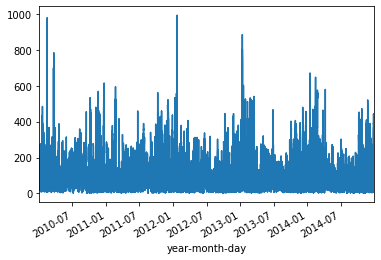

In [41]:
data_['pm2.5'].plot()

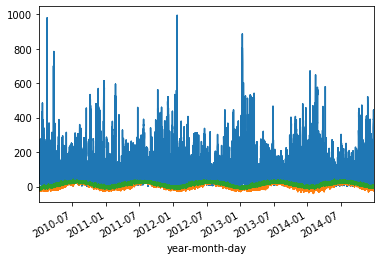

In [42]:
data_['pm2.5'].plot()
data_['DEWP'].plot()
data_['TEMP'].plot()

In [43]:
# 2010-2014 雾霾平均浓度
year_of_mean_pm2_5_ = data_['pm2.5'].groupby(lambda x: x.year).mean()
year_of_mean_pm2_5_

2010    104.045730
2011     99.071340
2012     90.545871
2013    101.712376
2014     97.734557
Name: pm2.5, dtype: float64

2010-2014北京雾霾平均浓度图 

In [44]:
pd_ = pd.period_range('2010', '2014', freq="A")

In [45]:
pd_

PeriodIndex(['2010', '2011', '2012', '2013', '2014'], dtype='period[A-DEC]', freq='A-DEC')

In [46]:
year_of_mean_pm2_5_.index = pd_

In [47]:
year_of_mean_pm2_5_.index.name = 'Year'

In [48]:
year_of_mean_pm2_5_

Year
2010    104.045730
2011     99.071340
2012     90.545871
2013    101.712376
2014     97.734557
Freq: A-DEC, Name: pm2.5, dtype: float64

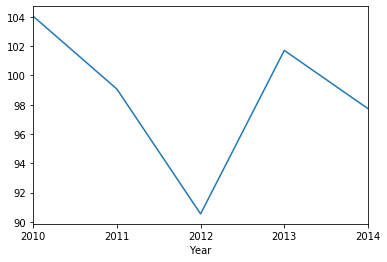

In [49]:
year_of_mean_pm2_5_.plot()